<a href="https://colab.research.google.com/github/hawaesanda/PCVK_2024/blob/main/Week10_Hawa_Esanda_2241720079.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODUL 10**
Thresholding, Segmentasi Sederhana

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan diatas

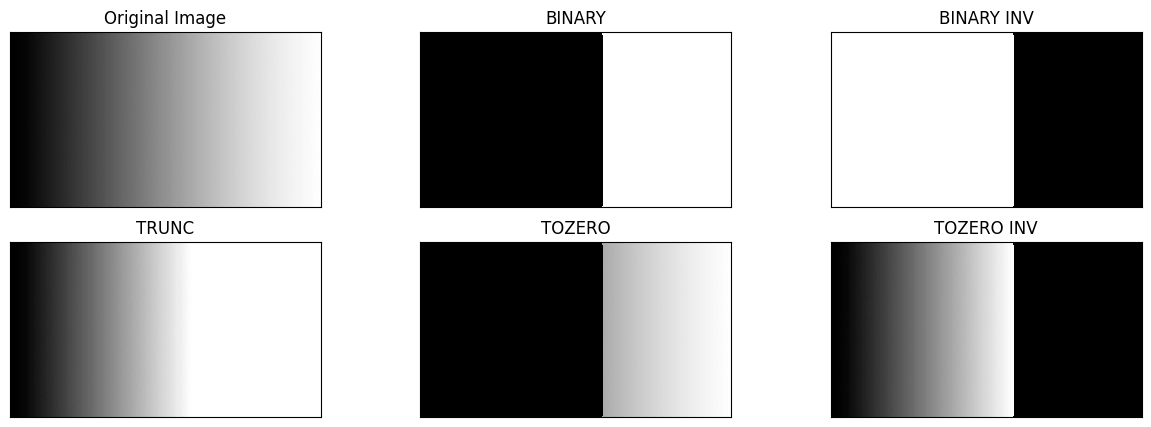

In [5]:
filename = ('/content/drive/MyDrive/Images/gradient.jpg')
img = cv2.imread(filename, 0)
thres = 170

# Binary thresholding
ret, thresh1 = cv2.threshold(img, thres, 255, cv2.THRESH_BINARY)
# Binary inverse thresholding
ret, thresh2 = cv2.threshold(img, thres, 255, cv2.THRESH_BINARY_INV)
# Threshold truncate
ret, thresh3 = cv2.threshold(img, thres, 255, cv2.THRESH_TRUNC)
# Threshold Tozero
ret, thresh4 = cv2.threshold(img, thres, 255, cv2.THRESH_TOZERO)
# Threshold Tozero Inverse
ret, thresh5 = cv2.threshold(img, thres, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY INV', 'TRUNC', 'TOZERO', 'TOZERO INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])
plt.show()



### Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

<ipython-input-12-5f0201d48124>:35: RuntimeWarning: invalid value encountered in scalar divide
  mean_foreground = (sum_total - sum_background)/weight_foreground


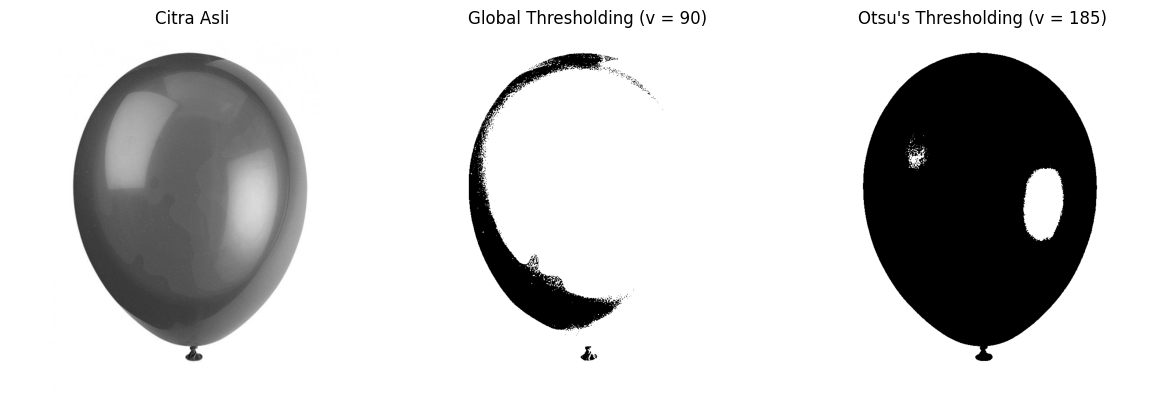

In [12]:
img = cv2.imread('/content/drive/MyDrive/Images/balloon.jpg', cv2.IMREAD_GRAYSCALE)

# Display original image
original_image = img

# Global Thresholding ( v = 90)
value = 90
ret, global_thresh_image = cv2.threshold(img, value, 255, cv2.THRESH_BINARY)

# Manual Otsu's thresholding
# Calculate histogram
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
total_pixels = img.size

# initiate values
current_max, threshold_value = 0, 0
sum_total, sum_background = 0, 0
weight_background, weight_foreground = 0, 0

# Corrected the operator to += for accumulation
for i  in range(256):
  sum_total += i*hist[i]

# Corrected the operator to += for accumulation
for i in range(256):
  weight_background += hist[i]
  if weight_background == 0:
    continue

  weight_foreground = total_pixels - weight_background # Corrected calculation of weight_foreground

  sum_background += i*hist[i]

  mean_background = sum_background/weight_background
  mean_foreground = (sum_total - sum_background)/weight_foreground

  # calculate between class variance
  between_class_variance = weight_background*weight_foreground*(mean_background - mean_foreground)**2

  if between_class_variance > current_max:
    current_max = between_class_variance
    threshold_value = i

# Moved otsu_thresh_image calculation outside the loop
otsu_thresh_image = np.where(img > threshold_value, 255, 0).astype(np.uint8)

# Display the results
plt.figure(figsize=(12, 4))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

# Global Thresholding (v = 90)
plt.subplot(1, 3, 2)
plt.imshow(global_thresh_image, cmap='gray')
plt.title(f'Global Thresholding (v = {value})')
plt.axis('off')

# Otsu's Thresholding
plt.subplot(1, 3, 3)
plt.imshow(otsu_thresh_image, cmap='gray')
plt.title(f"Otsu's Thresholding (v = {threshold_value})")
plt.axis('off')

plt.tight_layout()
plt.show()

### Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.

Petunjuk:
a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

b. Buka link berikut https://opencv-tutorial.readthedocs.io/en/latest/histogram/histogram.html

c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramny (dari contoh dibawah dinamakan dengan Citra Segment)

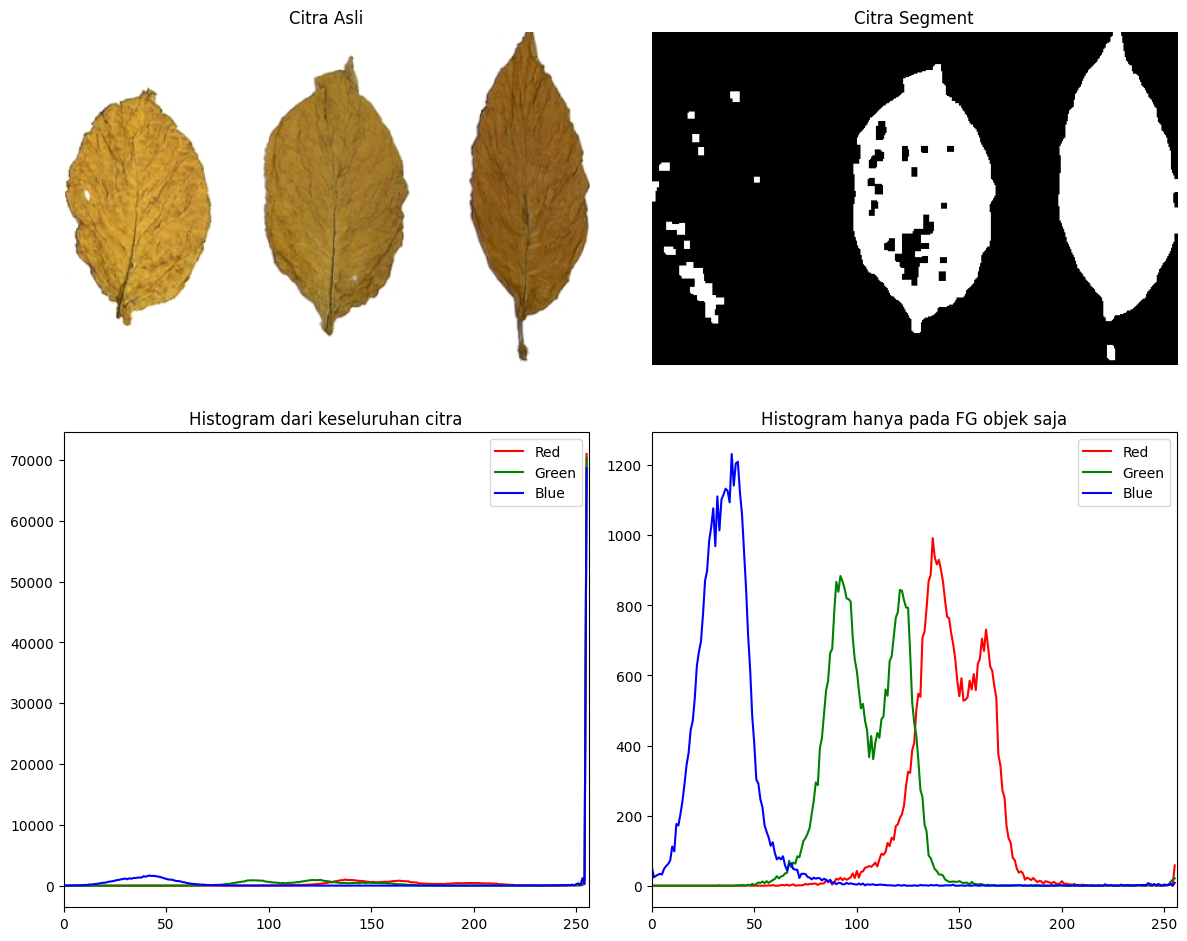

In [21]:
# Load the image in color
image = cv2.imread('/content/drive/MyDrive/Images/tobacco.jpg')  # Replace with the actual path to the image
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 1: Create a binary mask for segmentation
# Convert the image to grayscale for thresholding
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a binary inverse threshold to get the leaves as white on a black background
_, mask = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Use morphological operations to fill holes and remove noise
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # Fill small holes
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)   # Remove small noise

# Create the segmented image with white foreground and black background
segmented_image = np.zeros_like(image_rgb)  # Initialize a black image
segmented_image[mask == 255] = [255, 255, 255]  # Set the foreground (leaves) to white

# Step 2: Calculate histograms
# Histogram for the entire image
hist_full_r = cv2.calcHist([image_rgb], [0], None, [256], [0, 256])
hist_full_g = cv2.calcHist([image_rgb], [1], None, [256], [0, 256])
hist_full_b = cv2.calcHist([image_rgb], [2], None, [256], [0, 256])

# Histogram for the foreground (segmented area only)
hist_fg_r = cv2.calcHist([image_rgb], [0], mask, [256], [0, 256])
hist_fg_g = cv2.calcHist([image_rgb], [1], mask, [256], [0, 256])
hist_fg_b = cv2.calcHist([image_rgb], [2], mask, [256], [0, 256])

# Plot the results
plt.figure(figsize=(12, 10))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title("Citra Asli")
plt.axis('off')

# Segmented Image with White Foreground and Black Background
plt.subplot(2, 2, 2)
plt.imshow(segmented_image)
plt.title("Citra Segment")
plt.axis('off')

# Histogram of the entire image
plt.subplot(2, 2, 3)
plt.plot(hist_full_r, color='r', label='Red')
plt.plot(hist_full_g, color='g', label='Green')
plt.plot(hist_full_b, color='b', label='Blue')
plt.title("Histogram dari keseluruhan citra")
plt.xlim([0, 256])
plt.legend()

# Histogram of only the foreground (segmented area)
plt.subplot(2, 2, 4)
plt.plot(hist_fg_r, color='r', label='Red')
plt.plot(hist_fg_g, color='g', label='Green')
plt.plot(hist_fg_b, color='b', label='Blue')
plt.title("Histogram hanya pada FG objek saja")
plt.xlim([0, 256])
plt.legend()

plt.tight_layout()
plt.show()

### Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

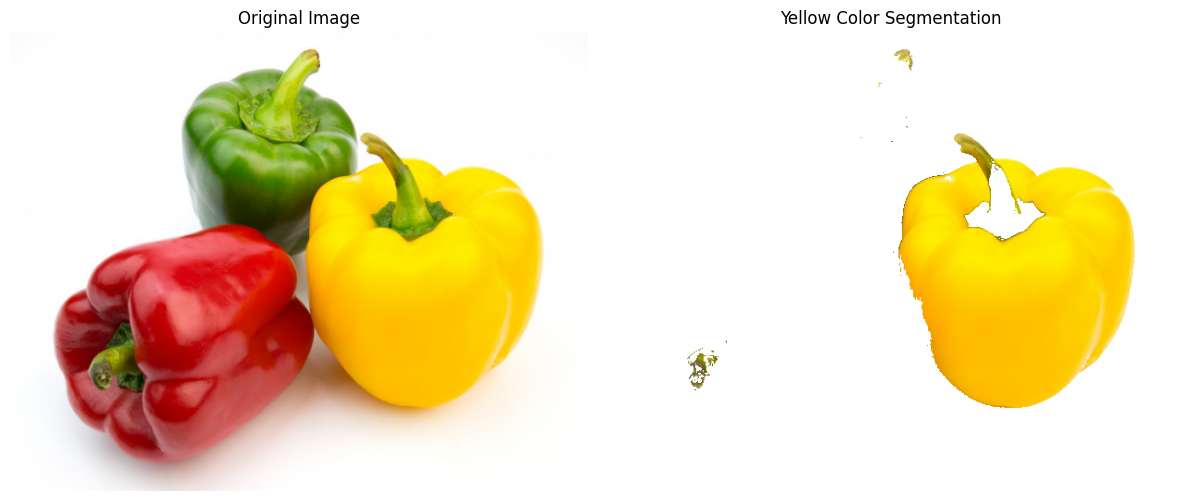

In [17]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/Images/peppers.jpg')  # Replace with the actual path to the image
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the HSV range for yellow color
lower_yellow = np.array([20, 100, 100])   # Lower bound of yellow in HSV
upper_yellow = np.array([30, 255, 255])   # Upper bound of yellow in HSV

# Create a mask for yellow color
mask = cv2.inRange(image_hsv, lower_yellow, upper_yellow)

# Create an output image where only the yellow regions are preserved
yellow_image = np.copy(image_rgb)
yellow_image[mask == 0] = [255, 255, 255]  # Set all non-yellow areas to white

# Plot the results
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Yellow Color Segmentation with White Background
plt.subplot(1, 2, 2)
plt.imshow(yellow_image)
plt.title("Yellow Color Segmentation")
plt.axis('off')

plt.tight_layout()
plt.show()

Saat anda menampilkan warna tertentu, jelaskan kendala yang di hadapi dan mengapa hal itu terjadi.
Jawab :
- Terdapat variasi pencahayaan
- Warna yang hampir sama
- Kebisingan pada citra
- Warna citra hampir mirip dengan background
- Kualitas gambar yang rendah

### Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code dan hasil image di modul ini.

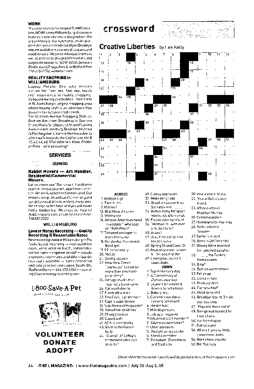

In [22]:
# Load image
image = cv2.imread('/content/drive/MyDrive/Images/crossword.jpg', cv2.IMREAD_GRAYSCALE)

# Threshold
_, thresholded_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Result
plt.imshow(thresholded_image, cmap='gray')
plt.axis('off')
plt.show()